In [1]:
!pip install python-dotenv


In [2]:
!pip install yfinance

In [3]:
!pip install tiingo

In [4]:
!pip install numpy

In [5]:
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint
!pip install tiingo


In [6]:
!pip install numpy

In [7]:
import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing

In [8]:
TIINGO_API_KEY = os.getenv("2a5349d70e03515872872f32b4b2d57bedfec835")
load_dotenv()

# 2a5349d70e03515872872f32b4b2d57bedfec835  mine
# 1b545063658e8ac3669f26afd4f3439ff66adb3f  original

True

In [9]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=2a5349d70e03515872872f32b4b2d57bedfec835",
                                    headers=headers)
print(requestResponse.json())
                                 

{'message': 'You successfully sent a request'}


In [10]:
from tiingo import TiingoClient



config = {
    'api_key': '2a5349d70e03515872872f32b4b2d57bedfec835',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

In [11]:
# You can obtain cryptocurrency metadata using the following method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

# meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')

#You can obtain top-of-book cryptocurrency quotes from the ``get_crypto_top_of_book()`` method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

# book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])

# You can obtain historical Cryptocurrency price quotes from the get_crypto_price_history() method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-12-01',
                                endDate='2022-05-09', resampleFreq='1Day')

In [12]:
history_data_BTC

[{'ticker': 'btcusd',
  'baseCurrency': 'btc',
  'quoteCurrency': 'usd',
  'priceData': [{'close': 18793.893916419034,
    'open': 19690.216670754748,
    'high': 19902.917357628077,
    'volumeNotional': 3234858504.7067456,
    'tradesDone': 2118819.0,
    'date': '2020-12-01T00:00:00+00:00',
    'volume': 172122.84580794908,
    'low': 18062.89812033529},
   {'close': 19208.893093693732,
    'open': 18780.031909617115,
    'high': 19339.721844582993,
    'volumeNotional': 1907462955.4447534,
    'tradesDone': 1636220.0,
    'date': '2020-12-02T00:00:00+00:00',
    'volume': 99301.03448131388,
    'low': 18333.281531012995},
   {'close': 19428.2042743612,
    'open': 19208.764210122692,
    'high': 19604.522036807055,
    'volumeNotional': 1692565010.714965,
    'tradesDone': 1297704.0,
    'date': '2020-12-03T00:00:00+00:00',
    'volume': 87118.9630710539,
    'low': 18872.26551162489},
   {'close': 18675.32401978046,
    'open': 19428.600979366107,
    'high': 19532.317111151377,
 

In [13]:
history_data_BTC[0]['priceData']

[{'close': 18793.893916419034,
  'open': 19690.216670754748,
  'high': 19902.917357628077,
  'volumeNotional': 3234858504.7067456,
  'tradesDone': 2118819.0,
  'date': '2020-12-01T00:00:00+00:00',
  'volume': 172122.84580794908,
  'low': 18062.89812033529},
 {'close': 19208.893093693732,
  'open': 18780.031909617115,
  'high': 19339.721844582993,
  'volumeNotional': 1907462955.4447534,
  'tradesDone': 1636220.0,
  'date': '2020-12-02T00:00:00+00:00',
  'volume': 99301.03448131388,
  'low': 18333.281531012995},
 {'close': 19428.2042743612,
  'open': 19208.764210122692,
  'high': 19604.522036807055,
  'volumeNotional': 1692565010.714965,
  'tradesDone': 1297704.0,
  'date': '2020-12-03T00:00:00+00:00',
  'volume': 87118.9630710539,
  'low': 18872.26551162489},
 {'close': 18675.32401978046,
  'open': 19428.600979366107,
  'high': 19532.317111151377,
  'volumeNotional': 1787832740.2959814,
  'tradesDone': 1380855.0,
  'date': '2020-12-04T00:00:00+00:00',
  'volume': 95732.35454455041,
  'l

In [14]:
# turn date into index and rename price data for each asset to make easier to concat

In [15]:
Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])

In [16]:
BTC_DAILY_CLOSE = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})

In [17]:
BTC_DAILY_CLOSE

BTC_DAILY_CLOSE
date                                      
2020-12-01T00:00:00+00:00     18793.893916
2020-12-02T00:00:00+00:00     19208.893094
2020-12-03T00:00:00+00:00     19428.204274
2020-12-04T00:00:00+00:00     18675.324020
2020-12-05T00:00:00+00:00     19149.959281
...                                    ...
2022-05-05T00:00:00+00:00     36552.633881
2022-05-06T00:00:00+00:00     36013.085887
2022-05-07T00:00:00+00:00     35472.405870
2022-05-08T00:00:00+00:00     34038.742977
2022-05-09T00:00:00+00:00     30192.335684

[525 rows x 1 columns]

In [18]:
!pip install python-dateutil

In [19]:
pd.to_datetime(BTC_DAILY_CLOSE.index).date

array([datetime.date(2020, 12, 1), datetime.date(2020, 12, 2),
       datetime.date(2020, 12, 3), datetime.date(2020, 12, 4),
       datetime.date(2020, 12, 5), datetime.date(2020, 12, 6),
       datetime.date(2020, 12, 7), datetime.date(2020, 12, 8),
       datetime.date(2020, 12, 9), datetime.date(2020, 12, 10),
       datetime.date(2020, 12, 11), datetime.date(2020, 12, 12),
       datetime.date(2020, 12, 13), datetime.date(2020, 12, 14),
       datetime.date(2020, 12, 15), datetime.date(2020, 12, 16),
       datetime.date(2020, 12, 17), datetime.date(2020, 12, 18),
       datetime.date(2020, 12, 19), datetime.date(2020, 12, 20),
       datetime.date(2020, 12, 21), datetime.date(2020, 12, 22),
       datetime.date(2020, 12, 23), datetime.date(2020, 12, 24),
       datetime.date(2020, 12, 25), datetime.date(2020, 12, 26),
       datetime.date(2020, 12, 27), datetime.date(2020, 12, 28),
       datetime.date(2020, 12, 29), datetime.date(2020, 12, 30),
       datetime.date(2020, 12, 31)

In [20]:
BTC_DAILY_CLOSE.index = pd.to_datetime(BTC_DAILY_CLOSE.index).date

In [21]:
BTC_DAILY_CLOSE

BTC_DAILY_CLOSE
2020-12-01     18793.893916
2020-12-02     19208.893094
2020-12-03     19428.204274
2020-12-04     18675.324020
2020-12-05     19149.959281
...                     ...
2022-05-05     36552.633881
2022-05-06     36013.085887
2022-05-07     35472.405870
2022-05-08     34038.742977
2022-05-09     30192.335684

[525 rows x 1 columns]

In [22]:
history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-12-1',
                                endDate='2022-5-9', resampleFreq='1Day')

In [23]:
history_data_ETH

[{'ticker': 'ethusd',
  'baseCurrency': 'eth',
  'quoteCurrency': 'usd',
  'priceData': [{'date': '2020-12-01T00:00:00+00:00',
    'open': 616.1559541585913,
    'high': 635.8877563349442,
    'low': 561.0153079430341,
    'close': 586.1392318198046,
    'volume': 2847758.3135092603,
    'volumeNotional': 1669182870.2887802,
    'tradesDone': 1065674.0},
   {'date': '2020-12-02T00:00:00+00:00',
    'open': 585.8123278918125,
    'high': 604.8983457024601,
    'low': 575.2330843344064,
    'close': 596.9978052601471,
    'volume': 1319983.3455787299,
    'volumeNotional': 788027160.290448,
    'tradesDone': 597962.0},
   {'date': '2020-12-03T00:00:00+00:00',
    'open': 596.9770496596266,
    'high': 623.6223215261864,
    'low': 585.9732826030248,
    'close': 615.849543984262,
    'volume': 1247079.32049281,
    'volumeNotional': 768013230.8377005,
    'tradesDone': 542625.0},
   {'date': '2020-12-04T00:00:00+00:00',
    'open': 615.9496273615458,
    'high': 620.0825544395246,
    'l

In [24]:
history_data_ETH[0]['priceData']

[{'date': '2020-12-01T00:00:00+00:00',
  'open': 616.1559541585913,
  'high': 635.8877563349442,
  'low': 561.0153079430341,
  'close': 586.1392318198046,
  'volume': 2847758.3135092603,
  'volumeNotional': 1669182870.2887802,
  'tradesDone': 1065674.0},
 {'date': '2020-12-02T00:00:00+00:00',
  'open': 585.8123278918125,
  'high': 604.8983457024601,
  'low': 575.2330843344064,
  'close': 596.9978052601471,
  'volume': 1319983.3455787299,
  'volumeNotional': 788027160.290448,
  'tradesDone': 597962.0},
 {'date': '2020-12-03T00:00:00+00:00',
  'open': 596.9770496596266,
  'high': 623.6223215261864,
  'low': 585.9732826030248,
  'close': 615.849543984262,
  'volume': 1247079.32049281,
  'volumeNotional': 768013230.8377005,
  'tradesDone': 542625.0},
 {'date': '2020-12-04T00:00:00+00:00',
  'open': 615.9496273615458,
  'high': 620.0825544395246,
  'low': 567.4676375033324,
  'close': 569.2928342181235,
  'volume': 1432416.7242723198,
  'volumeNotional': 815464576.7424293,
  'tradesDone': 6

In [25]:
Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

In [26]:
Historical_Crypto_ETH

date         open         high          low  \
0    2020-12-01T00:00:00+00:00   616.155954   635.887756   561.015308   
1    2020-12-02T00:00:00+00:00   585.812328   604.898346   575.233084   
2    2020-12-03T00:00:00+00:00   596.977050   623.622322   585.973283   
3    2020-12-04T00:00:00+00:00   615.949627   620.082554   567.467638   
4    2020-12-05T00:00:00+00:00   567.415467   597.251290   561.472555   
..                         ...          ...          ...          ...   
520  2022-05-05T00:00:00+00:00  2943.362004  2953.118568  2694.928303   
521  2022-05-06T00:00:00+00:00  2747.717828  2757.356795  2633.214893   
522  2022-05-07T00:00:00+00:00  2692.677555  2704.247639  2587.909150   
523  2022-05-08T00:00:00+00:00  2635.302349  2641.864924  2490.240749   
524  2022-05-09T00:00:00+00:00  2519.591694  2530.203031  2228.815798   

           close        volume  volumeNotional  tradesDone  
0     586.139232  2.847758e+06    1.669183e+09   1065674.0  
1     596.997805  1.319983e+06    7.880272e+08    597962.0  
2     615.849544  1.247079e+06    7.680132e+08    542625.0  
3     569.292834  1.432417e+06    8.154646e+08    625479.0  
4     596.881932  8.573710e+05    5.117492e+08    431172.0  
..           ...           ...             ...         ...  
520  2747.685714  5.731658e+05    1.574880e+09    821175.0  
521  2692.480301  6.383405e+05    1.718719e+09    873698.0  
522  2635.362448  3.585910e+05    9.450173e+08    662298.0  
523  2519.480467  6.935331e+05    1.747343e+09    889283.0  
524  2238.954093  1.034282e+06    2.315710e+09   1124552.0  

[525 rows x 8 columns]

In [27]:
ETH_DAILY_CLOSE = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})

In [28]:
ETH_DAILY_CLOSE

ETH_DAILY_CLOSE
date                                      
2020-12-01T00:00:00+00:00       586.139232
2020-12-02T00:00:00+00:00       596.997805
2020-12-03T00:00:00+00:00       615.849544
2020-12-04T00:00:00+00:00       569.292834
2020-12-05T00:00:00+00:00       596.881932
...                                    ...
2022-05-05T00:00:00+00:00      2747.685714
2022-05-06T00:00:00+00:00      2692.480301
2022-05-07T00:00:00+00:00      2635.362448
2022-05-08T00:00:00+00:00      2519.480467
2022-05-09T00:00:00+00:00      2238.954093

[525 rows x 1 columns]

In [29]:
pd.to_datetime(ETH_DAILY_CLOSE.index).date

array([datetime.date(2020, 12, 1), datetime.date(2020, 12, 2),
       datetime.date(2020, 12, 3), datetime.date(2020, 12, 4),
       datetime.date(2020, 12, 5), datetime.date(2020, 12, 6),
       datetime.date(2020, 12, 7), datetime.date(2020, 12, 8),
       datetime.date(2020, 12, 9), datetime.date(2020, 12, 10),
       datetime.date(2020, 12, 11), datetime.date(2020, 12, 12),
       datetime.date(2020, 12, 13), datetime.date(2020, 12, 14),
       datetime.date(2020, 12, 15), datetime.date(2020, 12, 16),
       datetime.date(2020, 12, 17), datetime.date(2020, 12, 18),
       datetime.date(2020, 12, 19), datetime.date(2020, 12, 20),
       datetime.date(2020, 12, 21), datetime.date(2020, 12, 22),
       datetime.date(2020, 12, 23), datetime.date(2020, 12, 24),
       datetime.date(2020, 12, 25), datetime.date(2020, 12, 26),
       datetime.date(2020, 12, 27), datetime.date(2020, 12, 28),
       datetime.date(2020, 12, 29), datetime.date(2020, 12, 30),
       datetime.date(2020, 12, 31)

In [30]:
ETH_DAILY_CLOSE.index = pd.to_datetime(ETH_DAILY_CLOSE.index).date

In [31]:
ETH_DAILY_CLOSE

ETH_DAILY_CLOSE
2020-12-01       586.139232
2020-12-02       596.997805
2020-12-03       615.849544
2020-12-04       569.292834
2020-12-05       596.881932
...                     ...
2022-05-05      2747.685714
2022-05-06      2692.480301
2022-05-07      2635.362448
2022-05-08      2519.480467
2022-05-09      2238.954093

[525 rows x 1 columns]

In [32]:
history_data_USDT = client.get_crypto_price_history(tickers = ['USDTUSD'], startDate='2020-12-1',
                                endDate='2022-5-9', resampleFreq='1Day')

history_data_USDT[0]['priceData']

Historical_Crypto_USDT = pd.DataFrame(history_data_USDT[0]['priceData'])

USDT_DAILY_CLOSE = Historical_Crypto_USDT.set_index('date')[['close']].rename(columns={'close':'USDT_DAILY_CLOSE'})

pd.to_datetime(USDT_DAILY_CLOSE.index).date

USDT_DAILY_CLOSE.index = pd.to_datetime(USDT_DAILY_CLOSE.index).date

In [33]:
USDT_DAILY_CLOSE

USDT_DAILY_CLOSE
2021-02-22          1.000700
2021-02-23          1.000300
2021-02-24          1.001000
2021-02-25          1.000000
2021-02-26          1.000100
...                      ...
2022-05-05          0.999847
2022-05-06          0.999507
2022-05-07          0.999812
2022-05-08          0.999381
2022-05-09          0.999858

[442 rows x 1 columns]

In [34]:
history_data_BNB = client.get_crypto_price_history(tickers = ['BNBUSD'], startDate='2020-12-1',
                                endDate='2022-5-9', resampleFreq='1Day')

history_data_BNB[0]['priceData']

Historical_Crypto_BNB = pd.DataFrame(history_data_BNB[0]['priceData'])

BNB_DAILY_CLOSE = Historical_Crypto_BNB.set_index('date')[['close']].rename(columns={'close':'BNB_DAILY_CLOSE'})

pd.to_datetime(BNB_DAILY_CLOSE.index).date

BNB_DAILY_CLOSE.index = pd.to_datetime(BNB_DAILY_CLOSE.index).date

In [35]:
BNB_DAILY_CLOSE

BNB_DAILY_CLOSE
2021-08-03       323.430000
2021-08-04       334.770000
2021-08-05       337.910000
2021-08-06       342.390000
2021-08-07       356.410000
...                     ...
2022-05-05       378.389210
2022-05-06       379.087920
2022-05-07       365.484681
2022-05-08       355.893985
2022-05-09       300.133097

[278 rows x 1 columns]

In [36]:
history_data_DOT = client.get_crypto_price_history(tickers = ['DOTUSD'], startDate='2020-12-1',
                                endDate='2022-5-9', resampleFreq='1Day')

history_data_DOT[0]['priceData']

Historical_Crypto_DOT = pd.DataFrame(history_data_DOT[0]['priceData'])

DOT_DAILY_CLOSE = Historical_Crypto_DOT.set_index('date')[['close']].rename(columns={'close':'DOT_DAILY_CLOSE'})

pd.to_datetime(DOT_DAILY_CLOSE.index).date

DOT_DAILY_CLOSE.index = pd.to_datetime(DOT_DAILY_CLOSE.index).date

In [37]:
DOT_DAILY_CLOSE

DOT_DAILY_CLOSE
2020-12-01         5.080676
2020-12-02         5.464681
2020-12-03         5.399671
2020-12-04         5.000207
2020-12-05         5.180760
...                     ...
2022-05-05        14.581421
2022-05-06        14.320049
2022-05-07        13.750105
2022-05-08        13.251310
2022-05-09        10.790564

[525 rows x 1 columns]

In [38]:
# Now Have:  ETH_DAILY_CLOSE, BTC_DAILY_CLOSE, USDT_DAILY_CLOSE, BNB_DAILY_CLOSE, DOT_DAILY_CLOSE  (to line 56 for concat)

In [39]:
ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,5,9,23,59).timetuple()))
interval = '1d'

In [40]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [41]:
data_spy = pd.read_csv(query_string)
data_spy.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2020-12-02  364.820007  366.959991  364.200012  366.790009  359.312408   
1  2020-12-03  366.679993  368.190002  365.500000  366.690002  359.214478   
2  2020-12-04  367.320007  369.850006  367.220001  369.850006  362.310059   
3  2020-12-07  369.019989  369.619995  367.720001  369.089996  361.565582   
4  2020-12-08  367.720001  370.779999  367.670013  370.170013  362.623566   
5  2020-12-09  370.880005  371.049988  365.950012  366.850006  359.371216   
6  2020-12-10  365.369995  367.859985  364.429993  366.730011  359.253693   
7  2020-12-11  364.899994  366.739990  363.260010  366.299988  358.832458   
8  2020-12-14  368.640015  369.799988  364.470001  364.660004  357.225891   
9  2020-12-15  367.399994  369.589996  365.920013  369.589996  362.055359   

     Volume  
0  45927000  
1  62882000  
2  50749900  
3  48944300  
4  42458900  
5  74098300  
6  57735400  
7  57698600  
8  69216200  
9  63865300

In [42]:
spy_daily_close = pd.DataFrame(data_spy)
spy_daily_close

Date        Open        High         Low       Close   Adj Close  \
0    2020-12-02  364.820007  366.959991  364.200012  366.790009  359.312408   
1    2020-12-03  366.679993  368.190002  365.500000  366.690002  359.214478   
2    2020-12-04  367.320007  369.850006  367.220001  369.850006  362.310059   
3    2020-12-07  369.019989  369.619995  367.720001  369.089996  361.565582   
4    2020-12-08  367.720001  370.779999  367.670013  370.170013  362.623566   
..          ...         ...         ...         ...         ...         ...   
356  2022-05-03  415.010010  418.929993  413.359985  416.380005  416.380005   
357  2022-05-04  417.079987  429.660004  413.709991  429.059998  429.059998   
358  2022-05-05  424.549988  425.000000  409.440002  413.809998  413.809998   
359  2022-05-06  411.100006  414.799988  405.730011  411.339996  411.339996   
360  2022-05-09  405.100006  406.410004  396.500000  398.170013  398.170013   

        Volume  
0     45927000  
1     62882000  
2     50749900  
3     48944300  
4     42458900  
..         ...  
356  100028200  
357  144247900  
358  172929100  
359  151671300  
360  155586100  

[361 rows x 7 columns]

In [43]:
spy_historical = spy_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY_DAILY_CLOSE'})
spy_historical

Date  SPY_DAILY_CLOSE
0    2020-12-02       359.312408
1    2020-12-03       359.214478
2    2020-12-04       362.310059
3    2020-12-07       361.565582
4    2020-12-08       362.623566
..          ...              ...
356  2022-05-03       416.380005
357  2022-05-04       429.059998
358  2022-05-05       413.809998
359  2022-05-06       411.339996
360  2022-05-09       398.170013

[361 rows x 2 columns]

In [44]:
spy_historical.set_index('Date', inplace=True)

In [45]:
spy_historical.index = pd.to_datetime(spy_historical.index).date

In [46]:
spy_historical

SPY_DAILY_CLOSE
2020-12-02       359.312408
2020-12-03       359.214478
2020-12-04       362.310059
2020-12-07       361.565582
2020-12-08       362.623566
...                     ...
2022-05-03       416.380005
2022-05-04       429.059998
2022-05-05       413.809998
2022-05-06       411.339996
2022-05-09       398.170013

[361 rows x 1 columns]

In [47]:
#Gold from yfinance
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,5,9,23,59).timetuple()))
interval = '1d'

In [48]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [49]:
data_gld = pd.read_csv(query_string)
data_gld.head(10)


Date        Open        High         Low       Close   Adj Close  \
0  2020-12-02  170.570007  171.759995  170.149994  171.460007  171.460007   
1  2020-12-03  172.639999  172.850006  171.080002  172.809998  172.809998   
2  2020-12-04  172.779999  173.320007  171.589996  172.320007  172.320007   
3  2020-12-07  172.559998  175.289993  172.509995  174.889999  174.889999   
4  2020-12-08  175.509995  175.929993  174.720001  175.500000  175.500000   
5  2020-12-09  173.919998  174.039993  171.240005  172.500000  172.500000   
6  2020-12-10  172.899994  173.580002  171.699997  172.169998  172.169998   
7  2020-12-11  172.250000  173.320007  172.110001  172.490005  172.490005   
8  2020-12-14  171.910004  172.520004  170.910004  171.539993  171.539993   
9  2020-12-15  173.429993  173.979996  173.059998  173.940002  173.940002   

     Volume  
0   9199700  
1  10457300  
2  10098600  
3  10555100  
4   6348400  
5  10743200  
6   6564000  
7   6084800  
8   7644400  
9   6840500

In [50]:
gld_daily_close = pd.DataFrame(data_gld)
gld_daily_close

Date        Open        High         Low       Close   Adj Close  \
0    2020-12-02  170.570007  171.759995  170.149994  171.460007  171.460007   
1    2020-12-03  172.639999  172.850006  171.080002  172.809998  172.809998   
2    2020-12-04  172.779999  173.320007  171.589996  172.320007  172.320007   
3    2020-12-07  172.559998  175.289993  172.509995  174.889999  174.889999   
4    2020-12-08  175.509995  175.929993  174.720001  175.500000  175.500000   
..          ...         ...         ...         ...         ...         ...   
356  2022-05-03  173.889999  175.210007  173.850006  174.089996  174.089996   
357  2022-05-04  174.320007  176.350006  173.669998  175.800003  175.800003   
358  2022-05-05  177.559998  177.610001  174.660004  175.130005  175.130005   
359  2022-05-06  175.389999  176.559998  174.860001  175.419998  175.419998   
360  2022-05-09  174.270004  174.270004  172.789993  172.880005  172.880005   

       Volume  
0     9199700  
1    10457300  
2    10098600  
3    10555100  
4     6348400  
..        ...  
356   7214300  
357  10491700  
358  12794200  
359   7641500  
360  10742400  

[361 rows x 7 columns]

In [51]:
gld_historical = gld_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD_DAILY_CLOSE'})
gld_historical

Date  GLD_DAILY_CLOSE
0    2020-12-02       171.460007
1    2020-12-03       172.809998
2    2020-12-04       172.320007
3    2020-12-07       174.889999
4    2020-12-08       175.500000
..          ...              ...
356  2022-05-03       174.089996
357  2022-05-04       175.800003
358  2022-05-05       175.130005
359  2022-05-06       175.419998
360  2022-05-09       172.880005

[361 rows x 2 columns]

In [52]:
gld_historical.set_index('Date', inplace=True)

In [53]:
gld_historical.index = pd.to_datetime(gld_historical.index).date

In [54]:
gld_historical

GLD_DAILY_CLOSE
2020-12-02       171.460007
2020-12-03       172.809998
2020-12-04       172.320007
2020-12-07       174.889999
2020-12-08       175.500000
...                     ...
2022-05-03       174.089996
2022-05-04       175.800003
2022-05-05       175.130005
2022-05-06       175.419998
2022-05-09       172.880005

[361 rows x 1 columns]

In [55]:
combined_frame = pd.concat([spy_historical, gld_historical, ETH_DAILY_CLOSE, BTC_DAILY_CLOSE, USDT_DAILY_CLOSE, BNB_DAILY_CLOSE, DOT_DAILY_CLOSE], axis=1, join="inner")

In [56]:
combined_frame 

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  \
2021-08-03       436.844604       169.490005      2508.819611   
2021-08-04       434.695801       169.529999      2724.865202   
2021-08-05       437.448669       168.860001      2827.709608   
2021-08-06       438.171509       164.639999      2891.974620   
2021-08-09       437.815033       161.720001      3161.338094   
...                     ...              ...              ...   
2022-05-03       416.380005       174.089996      2781.275036   
2022-05-04       429.059998       175.800003      2940.708531   
2022-05-05       413.809998       175.130005      2747.685714   
2022-05-06       411.339996       175.419998      2692.480301   
2022-05-09       398.170013       172.880005      2238.954093   

            BTC_DAILY_CLOSE  USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  \
2021-08-03     38203.429355          0.999998       323.430000   
2021-08-04     39723.924041          0.999994       334.770000   
2021-08-05     40871.153329          1.000398       337.910000   
2021-08-06     42843.232641          1.000384       342.390000   
2021-08-09     46264.509618          1.000182       354.330000   
...                     ...               ...              ...   
2022-05-03     37727.704521          0.999799       383.887113   
2022-05-04     39686.785687          0.999802       402.612403   
2022-05-05     36552.633881          0.999847       378.389210   
2022-05-06     36013.085887          0.999507       379.087920   
2022-05-09     30192.335684          0.999858       300.133097   

            DOT_DAILY_CLOSE  
2021-08-03        17.421927  
2021-08-04        19.149700  
2021-08-05        19.124357  
2021-08-06        20.416557  
2021-08-09        20.566199  
...                     ...  
2022-05-03        14.721813  
2022-05-04        16.337085  
2022-05-05        14.581421  
2022-05-06        14.320049  
2022-05-09        10.790564  

[192 rows x 7 columns]

In [57]:
scaler = preprocessing.MinMaxScaler()
names = combined_frame.columns
d = scaler.fit_transform(combined_frame)
scaled_combined_frame = pd.DataFrame(d, columns=names)
scaled_combined_frame.head()

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE  \
0         0.495444         0.270619         0.104993         0.214545   
1         0.467916         0.271944         0.189047         0.255265   
2         0.503182         0.249751         0.229059         0.285989   
3         0.512442         0.109970         0.254062         0.338804   
4         0.507875         0.013249         0.358859         0.430429   

   USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  DOT_DAILY_CLOSE  
0          0.302651         0.065918         0.154051  
1          0.300381         0.098005         0.194188  
2          0.548843         0.106889         0.193599  
3          0.540240         0.119565         0.223618  
4          0.416210         0.153349         0.227094

In [58]:
!pip install plotly

In [59]:
import plotly.express as px

In [60]:
px.scatter(scaled_combined_frame)

In [61]:
px.area(scaled_combined_frame)

In [62]:
px.parallel_coordinates(scaled_combined_frame)

In [63]:
scaled_combined_frame

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE  \
0           0.495444         0.270619         0.104993         0.214545   
1           0.467916         0.271944         0.189047         0.255265   
2           0.503182         0.249751         0.229059         0.285989   
3           0.512442         0.109970         0.254062         0.338804   
4           0.507875         0.013249         0.358859         0.430429   
..               ...              ...              ...              ...   
187         0.233280         0.422988         0.210993         0.201805   
188         0.395718         0.479629         0.273022         0.254271   
189         0.200357         0.457436         0.197925         0.170335   
190         0.168715         0.467042         0.176447         0.155886   
191         0.000000         0.382908         0.000000         0.000000   

     USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  DOT_DAILY_CLOSE  
0            0.302651         0.065918         0.154051  
1            0.300381         0.098005         0.194188  
2            0.548843         0.106889         0.193599  
3            0.540240         0.119565         0.223618  
4            0.416210         0.153349         0.227094  
..                ...              ...              ...  
187          0.180256         0.236981         0.091325  
188          0.181887         0.289963         0.128849  
189          0.209472         0.221424         0.088064  
190          0.000000         0.223401         0.081992  
191          0.216113         0.000000         0.000000  

[192 rows x 7 columns]

In [64]:
daily_returns = scaled_combined_frame.pct_change()

<AxesSubplot:>

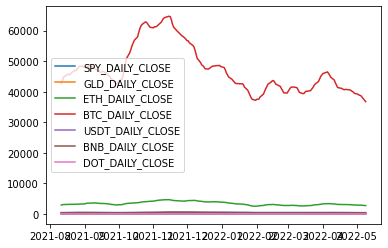

In [65]:
combined_frame.rolling(window=7).mean().plot()


<AxesSubplot:>

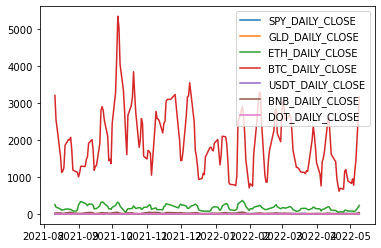

In [66]:
combined_frame.rolling(window=7).std().plot()

In [67]:
daily_returns = combined_frame.pct_change()

In [68]:
daily_returns.dropna()

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  \
2021-08-04        -0.004919         0.000236         0.086114   
2021-08-05         0.006333        -0.003952         0.037743   
2021-08-06         0.001652        -0.024991         0.022727   
2021-08-09        -0.000814        -0.017736         0.093142   
2021-08-10         0.001244         0.000309        -0.006225   
...                     ...              ...              ...   
2022-05-03         0.004584         0.002649        -0.026302   
2022-05-04         0.030453         0.009823         0.057324   
2022-05-05        -0.035543        -0.003811        -0.065638   
2022-05-06        -0.005969         0.001656        -0.020092   
2022-05-09        -0.032017        -0.014479        -0.168442   

            BTC_DAILY_CLOSE  USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  \
2021-08-04         0.039800         -0.000004         0.035062   
2021-08-05         0.028880          0.000403         0.009380   
2021-08-06         0.048251         -0.000014         0.013258   
2021-08-09         0.079856         -0.000201         0.034873   
2021-08-10        -0.014580          0.000141         0.049643   
...                     ...               ...              ...   
2022-05-03        -0.020596         -0.000095        -0.014410   
2022-05-04         0.051927          0.000003         0.048778   
2022-05-05        -0.078972          0.000045        -0.060165   
2022-05-06        -0.014761         -0.000340         0.001847   
2022-05-09        -0.161629          0.000351        -0.208276   

            DOT_DAILY_CLOSE  
2021-08-04         0.099172  
2021-08-05        -0.001323  
2021-08-06         0.067568  
2021-08-09         0.007329  
2021-08-10         0.002298  
...                     ...  
2022-05-03        -0.015877  
2022-05-04         0.109720  
2022-05-05        -0.107465  
2022-05-06        -0.017925  
2022-05-09        -0.246472  

[191 rows x 7 columns]

<AxesSubplot:>

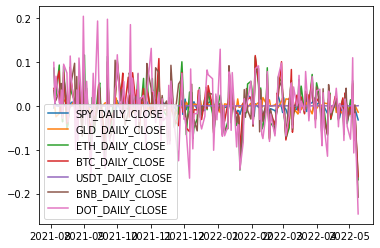

In [69]:
daily_returns.plot()

<AxesSubplot:>

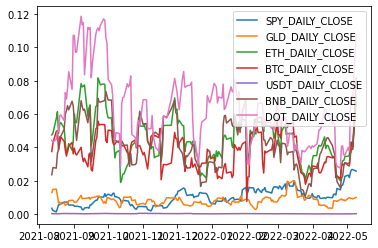

In [70]:
daily_returns.rolling(window=7).std().plot()

In [71]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  \
2021-08-03              NaN              NaN              NaN   
2021-08-04        -0.004919         0.000236         0.086114   
2021-08-05         0.001383        -0.003717         0.127108   
2021-08-06         0.003037        -0.028615         0.152723   
2021-08-09         0.002221        -0.045843         0.260090   
...                     ...              ...              ...   
2022-05-03        -0.046846         0.027140         0.108599   
2022-05-04        -0.017820         0.037229         0.172148   
2022-05-05        -0.052730         0.033276         0.095211   
2022-05-06        -0.058384         0.034987         0.073206   
2022-05-09        -0.088532         0.020001        -0.107567   

            BTC_DAILY_CLOSE  USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  \
2021-08-03              NaN               NaN              NaN   
2021-08-04         0.039800         -0.000004         0.035062   
2021-08-05         0.069829          0.000399         0.044770   
2021-08-06         0.121450          0.000386         0.058622   
2021-08-09         0.211004          0.000184         0.095538   
...                     ...               ...              ...   
2022-05-03        -0.012452         -0.000199         0.186925   
2022-05-04         0.038828         -0.000196         0.244821   
2022-05-05        -0.043211         -0.000151         0.169926   
2022-05-06        -0.057334         -0.000491         0.172086   
2022-05-09        -0.209696         -0.000140        -0.072031   

            DOT_DAILY_CLOSE  
2021-08-03              NaN  
2021-08-04         0.099172  
2021-08-05         0.097718  
2021-08-06         0.171889  
2021-08-09         0.180478  
...                     ...  
2022-05-03        -0.154984  
2022-05-04        -0.062269  
2022-05-05        -0.163042  
2022-05-06        -0.178044  
2022-05-09        -0.380633  

[192 rows x 7 columns]

<AxesSubplot:>

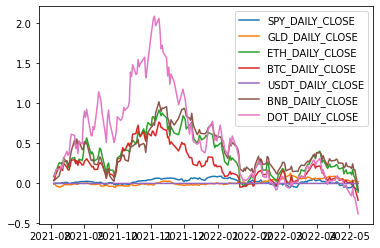

In [72]:
cumulative_returns.plot()

In [73]:
#normalized charts

<AxesSubplot:>

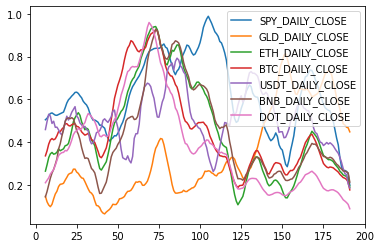

In [74]:
scaled_combined_frame.rolling(window=7).mean().plot()

<AxesSubplot:>

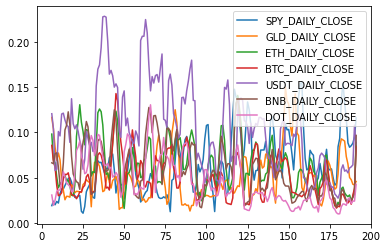

In [75]:
scaled_combined_frame.rolling(window=7).std().plot()

In [76]:
import seaborn as sns
%matplotlib inline

In [77]:
correlation = daily_returns.corr()
correlation

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  \
SPY_DAILY_CLOSE          1.000000        -0.106095         0.514749   
GLD_DAILY_CLOSE         -0.106095         1.000000         0.017919   
ETH_DAILY_CLOSE          0.514749         0.017919         1.000000   
BTC_DAILY_CLOSE          0.475584        -0.017757         0.861162   
USDT_DAILY_CLOSE         0.212614         0.042563         0.182183   
BNB_DAILY_CLOSE          0.391889         0.101797         0.800730   
DOT_DAILY_CLOSE          0.456403         0.099448         0.751984   

                  BTC_DAILY_CLOSE  USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  \
SPY_DAILY_CLOSE          0.475584          0.212614         0.391889   
GLD_DAILY_CLOSE         -0.017757          0.042563         0.101797   
ETH_DAILY_CLOSE          0.861162          0.182183         0.800730   
BTC_DAILY_CLOSE          1.000000          0.098754         0.745144   
USDT_DAILY_CLOSE         0.098754          1.000000         0.075807   
BNB_DAILY_CLOSE          0.745144          0.075807         1.000000   
DOT_DAILY_CLOSE          0.727509          0.116631         0.726072   

                  DOT_DAILY_CLOSE  
SPY_DAILY_CLOSE          0.456403  
GLD_DAILY_CLOSE          0.099448  
ETH_DAILY_CLOSE          0.751984  
BTC_DAILY_CLOSE          0.727509  
USDT_DAILY_CLOSE         0.116631  
BNB_DAILY_CLOSE          0.726072  
DOT_DAILY_CLOSE          1.000000

In [78]:
correlation.head()

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  \
SPY_DAILY_CLOSE          1.000000        -0.106095         0.514749   
GLD_DAILY_CLOSE         -0.106095         1.000000         0.017919   
ETH_DAILY_CLOSE          0.514749         0.017919         1.000000   
BTC_DAILY_CLOSE          0.475584        -0.017757         0.861162   
USDT_DAILY_CLOSE         0.212614         0.042563         0.182183   

                  BTC_DAILY_CLOSE  USDT_DAILY_CLOSE  BNB_DAILY_CLOSE  \
SPY_DAILY_CLOSE          0.475584          0.212614         0.391889   
GLD_DAILY_CLOSE         -0.017757          0.042563         0.101797   
ETH_DAILY_CLOSE          0.861162          0.182183         0.800730   
BTC_DAILY_CLOSE          1.000000          0.098754         0.745144   
USDT_DAILY_CLOSE         0.098754          1.000000         0.075807   

                  DOT_DAILY_CLOSE  
SPY_DAILY_CLOSE          0.456403  
GLD_DAILY_CLOSE          0.099448  
ETH_DAILY_CLOSE          0.751984  
BTC_DAILY_CLOSE          0.727509  
USDT_DAILY_CLOSE         0.116631

In [79]:
# Select list of columns
SPY_GLD_CORR = correlation[
    ["SPY_DAILY_CLOSE", "GLD_DAILY_CLOSE" ]
]

SPY_GLD_CORR.head()

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE
SPY_DAILY_CLOSE          1.000000        -0.106095
GLD_DAILY_CLOSE         -0.106095         1.000000
ETH_DAILY_CLOSE          0.514749         0.017919
BTC_DAILY_CLOSE          0.475584        -0.017757
USDT_DAILY_CLOSE         0.212614         0.042563

<AxesSubplot:>

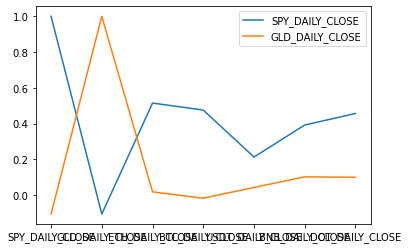

In [80]:
SPY_GLD_CORR.plot()

<AxesSubplot:>

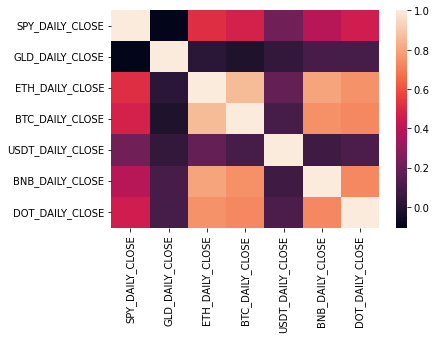

In [81]:
sns.heatmap(correlation)

<AxesSubplot:>

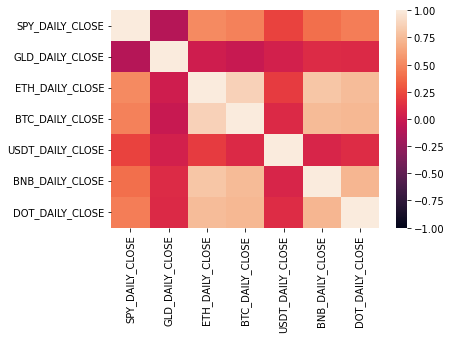

In [82]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [83]:
# new stuff

In [84]:
SPY_GLD_CORR = correlation[
    ["SPY_DAILY_CLOSE", "GLD_DAILY_CLOSE" ]
]

<AxesSubplot:>

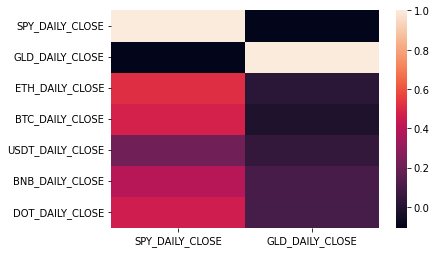

In [85]:
sns.heatmap(SPY_GLD_CORR)

<AxesSubplot:>

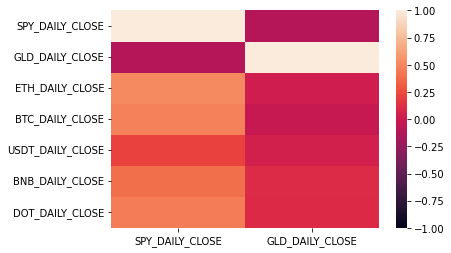

In [86]:
sns.heatmap(SPY_GLD_CORR, vmin=-1, vmax=1)

In [87]:
BTC_GLD_CORR = correlation[
    ["BTC_DAILY_CLOSE", "GLD_DAILY_CLOSE" ]
]

<AxesSubplot:>

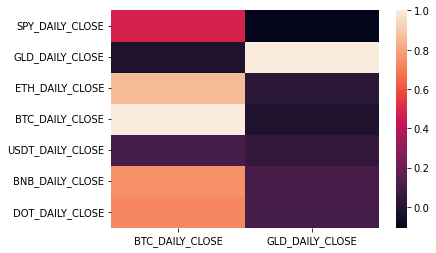

In [88]:
sns.heatmap(BTC_GLD_CORR)

<AxesSubplot:>

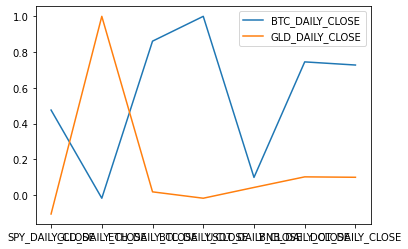

In [89]:
BTC_GLD_CORR.plot()

In [90]:
ETH_GLD_CORR = correlation[
    ["ETH_DAILY_CLOSE", "GLD_DAILY_CLOSE" ]
]

<AxesSubplot:>

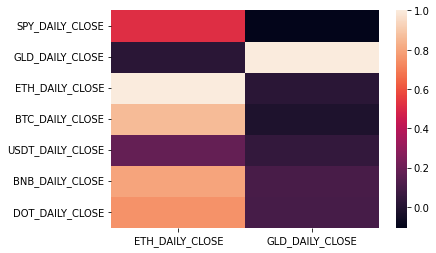

In [91]:
sns.heatmap(ETH_GLD_CORR)

In [92]:
BTC_ETH_CORR = correlation[
    ["BTC_DAILY_CLOSE", "ETH_DAILY_CLOSE" ]
]

<AxesSubplot:>

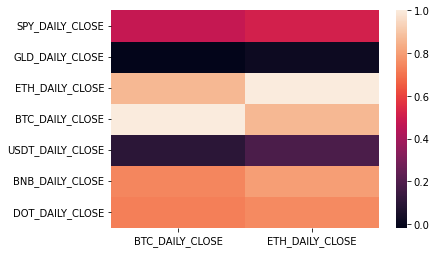

In [93]:
sns.heatmap(BTC_ETH_CORR)

In [94]:
BTC_SPY_CORR = correlation[
    ["BTC_DAILY_CLOSE", "SPY_DAILY_CLOSE" ]
]

<AxesSubplot:>

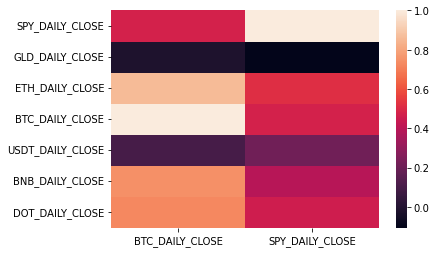

In [95]:
sns.heatmap(BTC_SPY_CORR)

In [96]:
ETH_SPY_CORR = correlation[
    ["ETH_DAILY_CLOSE", "SPY_DAILY_CLOSE" ]
]

<AxesSubplot:>

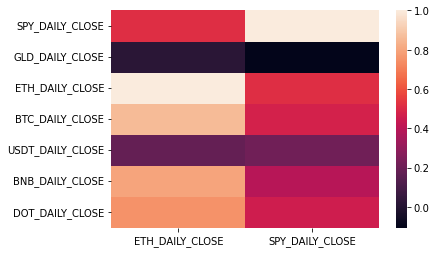

In [97]:
sns.heatmap(ETH_SPY_CORR)